<a href="https://colab.research.google.com/github/RajaSubramanian10/Hypothesis-Testing/blob/main/Hypothesis_Testing_on_the_dataset_from_UCI_Machine_Learning_Repository.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Perform Hypothesis Testing on the dataset from UCI Machine Learning Repository

**Author: Dr. R. Raja Subramanian**

In [25]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [3]:
heart_disease.data

{'ids': None,
 'features':      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   1       145   233    1        2      150      0      2.3   
 1     67    1   4       160   286    0        2      108      1      1.5   
 2     67    1   4       120   229    0        2      129      1      2.6   
 3     37    1   3       130   250    0        0      187      0      3.5   
 4     41    0   2       130   204    0        2      172      0      1.4   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   45    1   1       110   264    0        0      132      0      1.2   
 299   68    1   4       144   193    1        0      141      0      3.4   
 300   57    1   4       130   131    0        0      115      1      1.2   
 301   57    0   2       130   236    0        2      174      0      0.0   
 302   38    1   3       138   175    0        0      173      0      0.0   
 
      slope   ca  thal  
 0        3  0.0   6.0 

In [4]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [5]:
y

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


In [6]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size = 0.75, random_state= 9)

In [7]:
Xtrain = Xtrain.dropna()
ytrain = ytrain.loc[Xtrain.index]
Xtest = Xtest.dropna()
ytest = ytest.loc[Xtest.index]

In [8]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(Xtrain, ytrain)
pred1 = logit.predict(Xtest)
sum(pred1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


53

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xtrain, ytrain)
pred2 = knn.predict(Xtest)
sum(pred2)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


21

In [10]:
import pandas as pd
import numpy as np

In [11]:
model1 = np.array(pred1)
model2 = np.array(pred2)
df1 = pd.DataFrame(model1)
df2 = pd.DataFrame(model2)
pd.concat([df1, df2], axis=1).to_csv('Performance11.csv', header=['Model1', 'Model2'])

In [12]:
from scipy.stats import ttest_ind

perform_data = pd.read_csv("Performance11.csv")

model1 = perform_data[["Model1"]]
model2 = perform_data[["Model2"]]
# Perform t-test
t_statistic, p_value = ttest_ind(model1, model2)

# Print results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: [3.09436018]
P-value: [0.00237017]


In [13]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in the accuracy of Model A and Model B.")
    if t_statistic>0:
      print("Model 1 is better than Model 2")
    else:
      print("Model 2 is better than Model 1")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in the accuracy of Model A and Model B.")

Reject the null hypothesis.
There is a significant difference in the accuracy of Model A and Model B.
Model 1 is better than Model 2


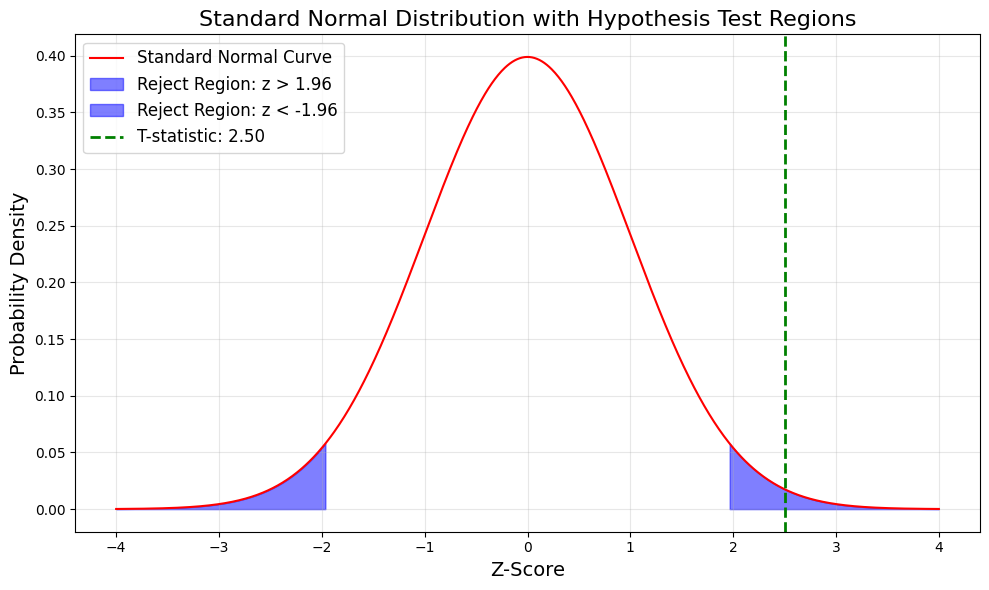

Reject the null hypothesis.
There is a significant difference between Model A and Model B.


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Inputs (Ensure values match actual test results)
alpha = 0.05
t_statistic = 2.5  # Replace this with your computed t-statistic
mean = 0
std_dev = 1

# Compute z-critical for two-tailed test
z_critical = norm.ppf(1 - alpha / 2)

# Z-score range
z = np.linspace(-4, 4, 1000)
y = norm.pdf(z, mean, std_dev)

# Plot the standard normal curve
plt.figure(figsize=(10, 6))
plt.plot(z, y, color='red', label='Standard Normal Curve')

# Shade critical regions
plt.fill_between(z, y, 0, where=(z > z_critical), color='blue', alpha=0.5, label=f'Reject Region: z > {z_critical:.2f}')
plt.fill_between(z, y, 0, where=(z < -z_critical), color='blue', alpha=0.5, label=f'Reject Region: z < {-z_critical:.2f}')

# Mark observed t-statistic
plt.axvline(x=t_statistic, color='green', linestyle='--', linewidth=2, label=f'T-statistic: {t_statistic:.2f}')

# Titles, labels, and legend
plt.title('Standard Normal Distribution with Hypothesis Test Regions', fontsize=16)
plt.xlabel('Z-Score', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Decision based on t-statistic and p-value
p_value = 2 * (1 - norm.cdf(abs(t_statistic)))  # Two-tailed p-value
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference between Model A and Model B.")
else:
    print("Fail to reject the null hypothesis.")
    print("No significant difference between Model A and Model B.")